In [74]:
# Importing 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import seaborn as sns
import pickle 

In [28]:
#Importing csv and reading it
lung_cancer = pd.read_csv("data/lung_cancer.csv")
lung_cancer.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [29]:
#Obeserving the data for more accurate model
print("Gender Type Values")
print(f'{lung_cancer["GENDER"].value_counts()} \n')

print("Age Type Values")
print(f'{lung_cancer["AGE"].value_counts()} \n')

print("Smoking Type Values")
print(f'{lung_cancer["SMOKING"].value_counts()} \n')

print("YELLOW_FINGERS Type Values")
print(f'{lung_cancer["YELLOW_FINGERS"].value_counts()} \n')

print("ANXIETY Finger Type Values")
print(f'{lung_cancer["ANXIETY"].value_counts()} \n')

print("PEER_PRESSURE Type Values")
print(f'{lung_cancer["PEER_PRESSURE"].value_counts()} \n')

print("CHRONIC DISEASE Type Values")
print(f'{lung_cancer["CHRONIC DISEASE"].value_counts()} \n')

# print("FATIGUE Type Values")
# print(f'{lung_cancer["FATIGUE"].value_counts()} \n')

# print("ALLERGY Type Values")
# print(f'{lung_cancer["ALLERGY"].value_counts()} \n')

print("WHEEZING Type Values")
print(f'{lung_cancer["WHEEZING"].value_counts()} \n')

print("ALCOHOL CONSUMING Type Values")
print(f'{lung_cancer["ALCOHOL CONSUMING"].value_counts()} \n')

print("COUGHING Type Values")
print(f'{lung_cancer["COUGHING"].value_counts()} \n')

print("SHORTNESS OF BREATH Type Values")
print(f'{lung_cancer["SHORTNESS OF BREATH"].value_counts()} \n')

print("SWALLOWING DIFFICULTY Type Values")
print(f'{lung_cancer["SWALLOWING DIFFICULTY"].value_counts()} \n')

print("CHEST PAIN Type Values")
print(f'{lung_cancer["CHEST PAIN"].value_counts()} \n')

print("LUNG_CANCER Type Values")
print(f'{lung_cancer["LUNG_CANCER"].value_counts()} \n')






Gender Type Values
GENDER
M    162
F    147
Name: count, dtype: int64 

Age Type Values
AGE
64    20
63    19
56    19
62    18
60    17
61    16
59    15
70    15
67    13
58    13
69    11
55    11
72    10
71    10
68     9
57     9
77     9
51     8
54     8
65     7
74     6
75     5
76     4
52     4
53     4
73     4
47     4
66     4
49     3
81     2
78     2
44     2
48     2
21     1
79     1
38     1
39     1
87     1
46     1
Name: count, dtype: int64 

Smoking Type Values
SMOKING
2    174
1    135
Name: count, dtype: int64 

YELLOW_FINGERS Type Values
YELLOW_FINGERS
2    176
1    133
Name: count, dtype: int64 

ANXIETY Finger Type Values
ANXIETY
1    155
2    154
Name: count, dtype: int64 

PEER_PRESSURE Type Values
PEER_PRESSURE
2    155
1    154
Name: count, dtype: int64 

CHRONIC DISEASE Type Values
CHRONIC DISEASE
2    156
1    153
Name: count, dtype: int64 

WHEEZING Type Values
WHEEZING
2    172
1    137
Name: count, dtype: int64 

ALCOHOL CONSUMING Type Values
ALCO

In [30]:
#Checking for missing value
lung_cancer.isna().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [60]:
#Seperating feature and label

x= lung_cancer.drop("LUNG_CANCER", axis=1)
y_transformed = lung_cancer["LUNG_CANCER"].map({"YES": 1,"NO": 0})

In [61]:
# Turing columns to categorical to product better restuls
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

one_hot = OneHotEncoder()
categorical_features_x = ["GENDER", "AGE", "SMOKING", "YELLOW_FINGERS", "ANXIETY", "PEER_PRESSURE", "CHRONIC DISEASE", "WHEEZING", "ALCOHOL CONSUMING", "COUGHING", "SHORTNESS OF BREATH", "SWALLOWING DIFFICULTY", "CHEST PAIN"]
transformer_x = ColumnTransformer([("one_hot", one_hot, categorical_features_x)], remainder="passthrough")
transformed_x = transformer_x.fit_transform(x)
transformed_x




<309x65 sparse matrix of type '<class 'numpy.float64'>'
	with 4635 stored elements in Compressed Sparse Row format>

In [62]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(transformed_x,y_transformed,test_size=0.2)

In [63]:
# choosing the model and hyperparameters
np.random.seed(42)
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100)
# keeping the default params
model.get_params()

model.fit(x_train,y_train)
model.score(x_test,y_test)


0.9354838709677419

In [64]:
y_preds = model.predict(x_test)

In [65]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [66]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.71      0.71      0.71         7
           1       0.96      0.96      0.96        55

    accuracy                           0.94        62
   macro avg       0.84      0.84      0.84        62
weighted avg       0.94      0.94      0.94        62



In [67]:
confusion_matrix(y_test,y_preds)

array([[ 5,  2],
       [ 2, 53]])

In [68]:
accuracy_score(y_test,y_preds)

0.9354838709677419

              precision    recall  f1-score   support

           0       0.71      0.71      0.71         7
           1       0.96      0.96      0.96        55

    accuracy                           0.94        62
   macro avg       0.84      0.84      0.84        62
weighted avg       0.94      0.94      0.94        62



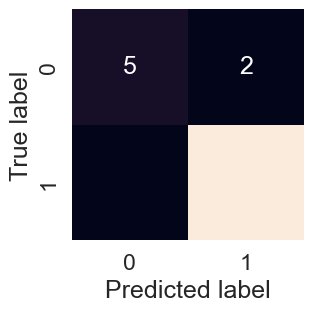

In [69]:
sns.set_theme(font_scale=1.5)
def plot_confusion_matrix(y_test, y_preds):
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                    annot=True,
                    cbar=False)
    plt.xlabel("Predicted label") # predictions go on the x-axis
    plt.ylabel("True label") # true labels go on the y-axis 
    
plot_confusion_matrix(y_test, y_preds)
print(classification_report(y_test, y_preds))

In [73]:
y_preds = model.predict(x_test)
array1 = np.array(y_test)
array2 = np.array(y_preds)
# Convert the arrays to Pandas Series to plot a table for y_test array
series1 = pd.Series(array1, name="Actual Values")
# Convert the arrays to Pandas Series to plot a table for y_preds array
series2 = pd.Series(array2, name="Predictions")
# Combine the Series into a single DataFrame
df = pd.concat([series1, series2], axis=1)
# Set the Pandas display options to show all rows and columns without truncation
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

print(df)


    Actual Values  Predictions
0               1            1
1               1            1
2               1            1
3               0            0
4               1            1
5               1            1
6               1            1
7               1            1
8               1            1
9               1            1
10              1            0
11              1            1
12              0            0
13              1            1
14              1            1
15              1            1
16              1            1
17              1            1
18              1            1
19              1            1
20              1            1
21              1            1
22              1            1
23              1            1
24              1            1
25              1            1
26              1            1
27              1            1
28              1            0
29              1            1
30              1            1
31      

In [75]:
pickle.dump(model,open("lungs_model_forst_model_1.pkl","wb"))